In [1]:
f30 <- read.csv('data/WHI/Medical History/f30_ctos_inv/f30_ctos_inv.dat',
               sep='\t', header=T)

In [2]:
dim(f30)

[1] 161701    113

In [3]:
library(dplyr)
glaucoma.data <- f30 %>%
    select(ID, GLAUCOMA)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
MRI.abnormal <- read.csv('data/MRI1_abnormalvol.csv', header=T, stringsAsFactor=F)
abnormal.sum <- apply(MRI.abnormal[,-1], 1, sum)
MRI.regional <- read.csv('data/MRI1_totalvol.csv', header=T, stringsAsFactor=F)
regional.sum <- apply(MRI.regional[,-c(1, dim(MRI.regional)[2])], 1, sum)
MRI.abnormal <- cbind(MRI.abnormal, abnormal.sum)
MRI.regional <- cbind(MRI.regional, regional.sum)

In [5]:
data.merged <- left_join(MRI.regional, MRI.abnormal, by=c('id')) %>%
    inner_join(glaucoma.data, by=c('id'='ID')) %>%
    filter(!is.na(GLAUCOMA))

In [6]:
dim(data.merged)

[1] 1376  193

In [7]:
unique(data.merged$GLAUCOMA)

[1] 0 1

In [8]:
sum(data.merged$GLAUCOMA==0, na.rm = T)

[1] 1286

In [9]:
sum(data.merged$GLAUCOMA==1, na.rm = T)

[1] 90

## Linear regression on the regional and abnormal 
- ratio between sum of abnormal regions and icv

In [15]:
occipital <- sapply(names(data.merged), function(x) grepl(pattern='occipital', x))

In [18]:
occipital.idx <- which(occipital)

In [27]:
regional.occipital <- occipital.idx[1:10]
abnormal.occipital <- occipital.idx[-seq(10)]

In [28]:
regional.occipitalsum <- apply(data.merged[,regional.occipital], 1, sum)
abnormal.occipitalsum <- apply(data.merged[,abnormal.occipital], 1, sum)

In [39]:
abnormal.occipitalsum

[1] 0.5 1.0 0.2 0.3 0.4 0.8 0.0 3.6 0.0 0.1 0.3 0.3 0.1 0.0 0.0 3.2 0.1 0.0
  [19] 0.3 0.5 0.1 0.2 0.5 0.7 0.3 0.0 0.0 0.6 0.1 0.5 0.0 1.6 0.5 0.0 0.0 0.7
  [37] 0.1 0.0 0.7 1.1 0.6 0.7 0.0 0.0 0.0 2.1 0.0 0.0 0.5 0.1 0.0 0.1 0.3 0.7
  [55] 0.0 0.2 0.0 0.2 0.1 0.1 0.0 1.7 1.3 0.4 0.1 0.7 0.2 0.3 0.5 0.1 1.1 1.0
  [73] 0.0 0.3 0.1 0.2 0.0 0.0 0.9 0.5 0.5 1.2 0.2 0.2 0.4 0.0 0.9 1.1 0.5 1.0
  [91] 0.2 0.4 0.4 0.0 0.0 0.0 0.4 0.2 0.3 0.0 0.0 0.1 0.6 0.1 2.3 1.9 0.8 0.5
 [109] 0.0 0.2 0.3 0.8 0.0 0.6 0.7 0.2 0.7 0.9 0.5 0.0 0.0 0.2 0.9 0.1 1.6 0.0
 [127] 2.3 0.5 0.1 0.0 0.5 1.3 0.0 0.0 0.0 0.1 0.5 1.5 0.0 0.4 0.0 0.1 0.4 0.3
 [145] 0.0 0.2 0.3 0.5 0.0 0.3 0.0 0.1 0.2 0.1 0.8 0.0 1.0 2.2 0.4 0.1 0.1 0.6
 [163] 0.5 0.8 0.2 1.7 0.0 0.0 0.6 0.1 0.1 0.2 0.5 0.3 2.1 0.3 0.5 0.0 0.0 0.6
 [181] 0.1 0.0 1.3 0.2 1.0 0.2 0.0 2.6 0.2 1.4 2.0 0.0 0.0 2.4 0.0 1.6 1.5 0.5
 [199] 0.0 0.8 0.7 0.8 0.2 0.8 0.2 0.3 0.0 0.0 0.4 0.2 0.5 0.2 0.3 0.0 0.0 0.1
 [217] 0.3 0.0 0.2 0.0 0.7 0.0 0.0 0.2 0.1 0.0 0.3 0.0 0.0 0.3 0.4 0.0 0.3 1.8
 [235] 0.1 0.0 0.5 0.0 0.9 0.2 2.1 0.0 0.4 0.1 0.1 0.1 0.0 0.2 1.3 0.0 1.7 0.0
 [253] 0.4 0.5 0.7 0.1 0.6 0.0 2.0 2.1 0.0 0.9 0.9 0.6 1.1 2.4 0.0 0.2 0.0 0.0
 [271] 1.6 0.0 0.0 1.1 0.1 0.0 0.0 0.5 0.7 0.0 0.0 0.2 0.1 1.0 1.0 0.0 0.0 1.7
 [289] 0.3 0.2 0.5 0.0 0.4 0.0 0.0 0.2 0.0 1.2 0.1 0.4 0.0 0.3 0.1 1.1 0.3 2.4
 [307] 0.3 0.2 0.0 0.1 0.3 0.0 0.0 0.7 1.5 0.3 0.2 0.2 0.1 0.3 2.6 0.0 1.3 0.0
 [325] 0.3 0.3 0.0 1.5 0.3 1.5 0.1 0.2 0.6 1.4 0.6 0.3 0.0 0.0 0.7 0.2 0.0 1.0
 [343] 2.1 0.0 1.1 2.0 0.1 0.2 0.1 0.0 0.6 0.0 0.2 0.3 0.0 0.1 0.7 0.5 0.2 0.0
 [361] 0.6 0.9 0.3 0.0 0.0 0.1 0.4 1.8 0.0 0.0 0.3 0.1 1.1 1.3 0.5 0.0 0.0 0.2
 [379] 1.2 0.2 0.1 0.8 0.2 0.2 0.0 0.5 0.0 0.0 1.0 0.0 0.0 0.4 1.0 0.1 1.4 0.0
 [397] 1.0 0.7 0.0 0.0 0.1 0.1 0.1 0.3 0.5 0.1 0.1 0.0 0.0 0.1 0.1 1.2 1.0 0.0
 [415] 0.0 0.7 0.6 0.0 0.4 1.1 0.3 0.0 2.1 1.1 0.3 0.4 2.1 0.4 1.2 0.3 0.6 0.0
 [433] 0.0 0.0 0.0 0.1 0.5 0.4 0.1 0.9 1.0 0.1 0.7 1.1 0.1 0.1 0.4 0.0 0.7 0.6
 [451] 0.0 0.0 0.3 0.1 1.0 0.0 0.0 0.2 0.2 0.0 0.3 0.3 0.4 0.3 0.7 0.1 0.0 0.1
 [469] 0.0 0.3 0.2 0.1 0.0 3.6 0.4 0.2 0.0 0.3 0.0 0.4 0.0 0.5 0.3 0.0 1.0 0.0
 [487] 0.4 0.6 0.0 0.0 0.0 0.2 0.3 0.1 1.0 0.1 0.0 0.0 0.5 0.3 0.0 0.0 0.0 2.0
 [505] 0.0 1.5 0.7 0.1 0.8 0.0 0.1 0.0 0.2 0.7 0.5 0.1 0.0 0.5 0.2 0.7 0.5 0.6
 [523] 0.0 0.0 0.4 0.1 0.6 1.1 0.0 0.4 0.0 0.1 0.0 0.3 0.1 1.4 0.4 1.0 0.0 0.3
 [541] 0.2 0.5 0.5 0.5 0.1 0.4 0.5 0.0 1.1 0.5 0.0 0.0 1.2 1.5 0.2 0.1 0.0 0.9
 [559] 0.2 0.5 1.1 0.1 0.3 0.0 1.0 0.3 0.0 1.3 0.2 0.3 0.2 0.1 0.0 0.0 1.4 0.3
 [577] 0.2 1.2 0.4 1.5 0.2 0.0 0.0 0.5 0.6 0.0 1.3 0.0 0.1 0.5 0.0 0.8 0.2 0.2
 [595] 0.0 0.9 1.0 0.1 0.4 0.1 0.0 1.4 0.1 0.6 0.7 0.6 0.2 1.0 0.9 0.7 0.5 0.1
 [613] 1.1 0.2 0.0 0.2 0.1 0.4 0.3 0.4 0.2 0.3 0.2 0.3 0.6 0.4 0.3 0.3 1.2 0.8
 [631] 1.4 1.0 0.1 0.2 0.0 0.4 0.6 0.8 0.1 0.3 0.4 0.8 0.5 1.8 1.1 0.6 0.5 3.3
 [649] 0.1 0.7 0.6 0.2 0.3 0.9 0.1 1.0 0.0 1.4 0.0 0.4 0.9 1.6 0.0 0.0 0.0 0.0
 [667] 0.2 0.7 0.9 0.6 0.6 0.2 1.1 0.3 0.0 0.2 1.1 0.5 0.1 0.6 0.0 0.0 0.8 0.0
 [685] 0.6 0.3 1.3 1.0 0.3 0.0 0.1 0.9 0.1 2.2 1.3 0.1 0.3 0.0 2.0 0.0 0.0 0.4
 [703] 0.6 2.5 0.2 2.1 0.6 0.0 0.4 0.0 0.1 0.4 0.0 0.9 1.6 0.2 0.4 0.2 0.6 5.7
 [721] 0.6 0.3 1.3 0.2 0.2 1.0 0.5 0.2 0.1 0.3 1.4 1.3 0.1 0.1 0.3 0.0 1.0 0.2
 [739] 0.9 0.4 1.5 0.3 0.1 0.6 0.0 0.0 0.8 0.0 1.7 0.3 0.8 0.2 3.8 0.0 0.2 0.0
 [757] 0.1 1.8 0.0 0.1 0.2 0.0 0.4 0.2 0.1 1.6 0.1 0.0 0.6 2.4 0.2 0.0 0.3 0.5
 [775] 0.1 0.0 1.1 1.0 0.7 3.6 0.1 1.0 0.4 0.0 0.1 0.0 0.6 0.1 0.0 0.3 1.0 0.0
 [793] 1.7 0.9 0.0 0.1 1.2 1.0 0.2 0.1 0.1 0.0 0.4 0.1 0.0 0.0 0.5 1.3 1.4 0.1
 [811] 0.2 0.0 0.0 0.1 0.0 0.1 0.0 0.2 1.0 0.0 0.1 0.0 0.0 0.2 0.7 0.3 0.4 1.0
 [829] 1.1 0.1 1.2 0.0 1.5 0.3 0.7 0.0 0.3 1.1 0.6 0.3 0.1 0.1 0.1 1.0 0.1 0.1
 [847] 0.4 0.3 0.0 0.8 0.0 0.8 0.5 0.3 0.6 0.0 0.0 0.0 0.1 1.3 0.7 0.9 1.5 0.1
 [865] 0.4 0.0 0.6 0.1 0.1 5.4 0.2 0.3 0.6 3.4 0.0 0.2 0.1 1.1 0.4 0.1 0.1 0.0
 [883] 0.0 0.9 1.4 0.0 0.4 0.2 0.0 0.6 0.8 0.0 0.0 0.3 0.1 0.1 0.4 0.0 0.1 0.4
 [901] 0.1 1.0 1.1 0.2 0.9 0.1 0.0 0.2 0.1 0.3 0.3 0.

In [35]:
lm.fit <- lm(regional.occipitalsum~GLAUCOMA, data=data.merged)

In [36]:
summary(lm.fit)


Call:
lm(formula = regional.occipitalsum ~ GLAUCOMA, data = data.merged)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.528  -6.597  -0.797   5.603  67.103 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6969     0.2841 252.356   <2e-16 ***
GLAUCOMA      0.1309     1.1109   0.118    0.906    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.19 on 1374 degrees of freedom
Multiple R-squared:  1.01e-05,	Adjusted R-squared:  -0.0007177 
F-statistic: 0.01388 on 1 and 1374 DF,  p-value: 0.9062


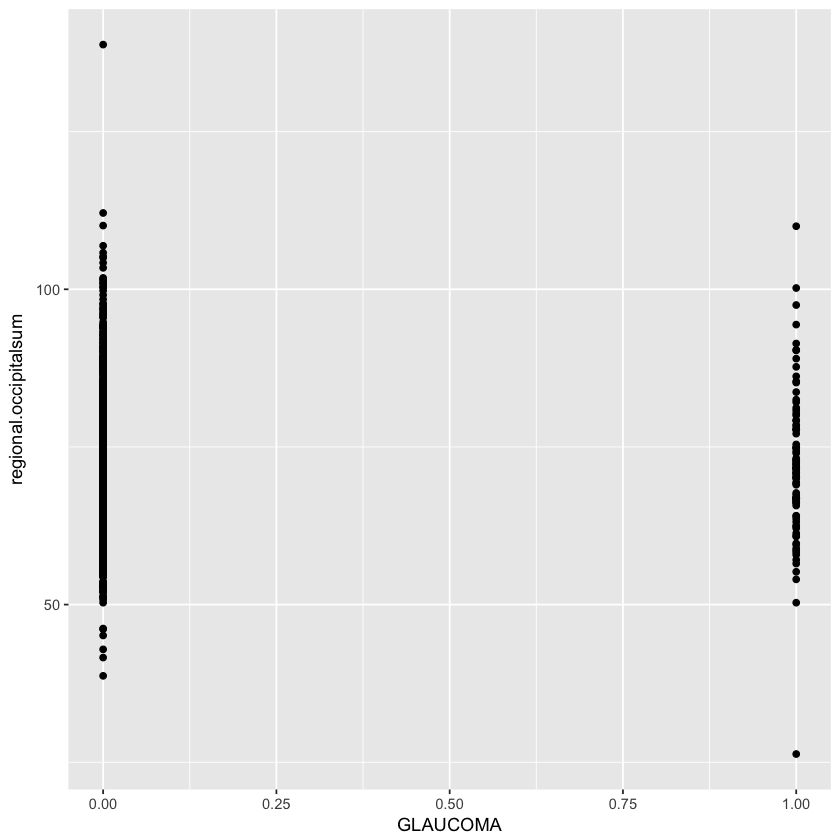

In [37]:
library(ggplot2)
ggplot(data=data.merged) +
geom_point(aes(x=GLAUCOMA, y=regional.occipitalsum))

In [47]:
lm.fit2 <- lm(abnormal.occipitalsum~GLAUCOMA, data=data.merged)

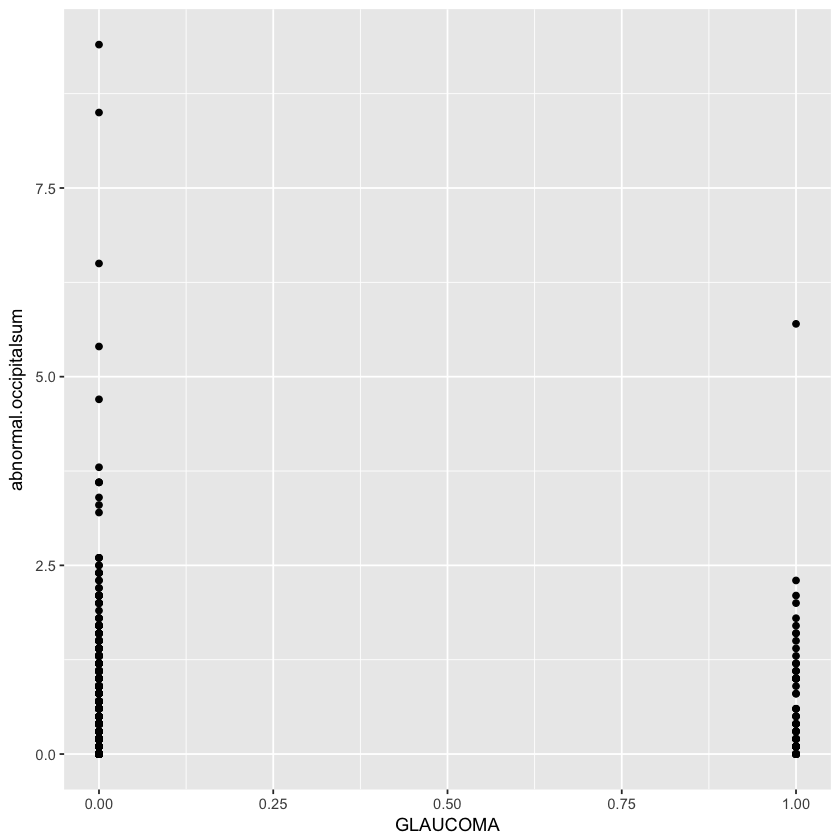

In [44]:
library(ggplot2)
ggplot(data=data.merged) +
geom_point(aes(x=GLAUCOMA, y=abnormal.occipitalsum))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


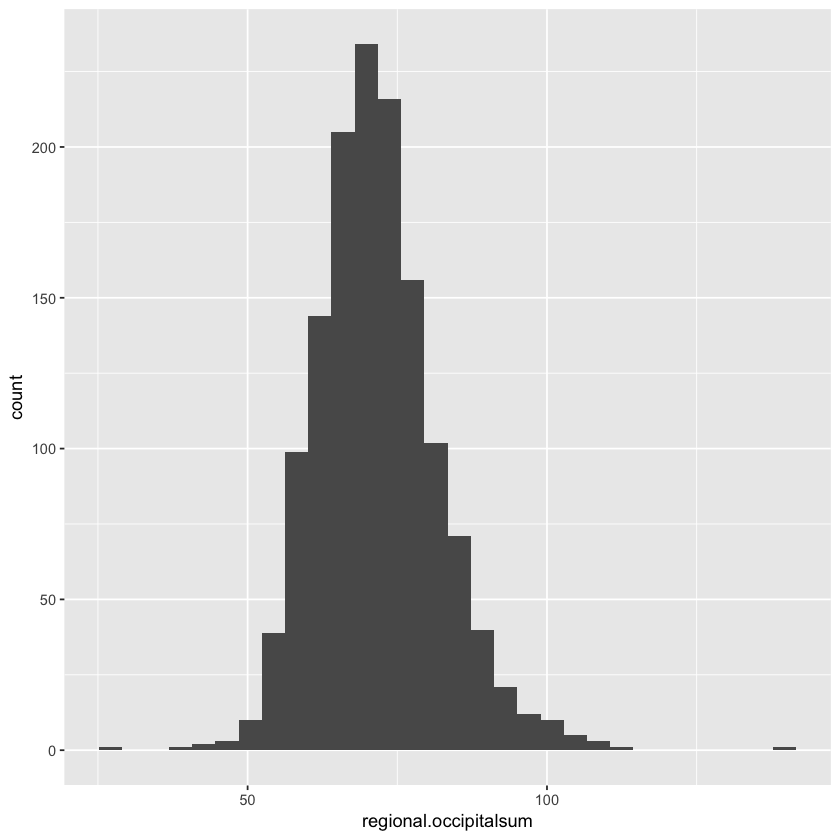

In [48]:
ggplot() + 
geom_histogram(aes(x=regional.occipitalsum))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


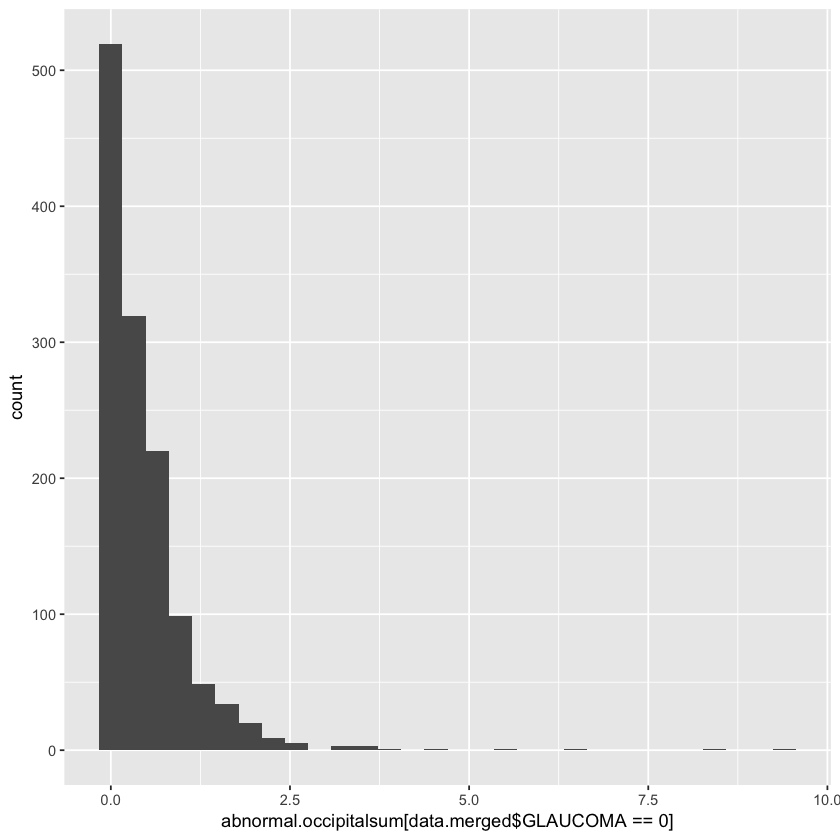

In [50]:
ggplot() + 
geom_histogram(aes(x=abnormal.occipitalsum[data.merged$GLAUCOMA==0]))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


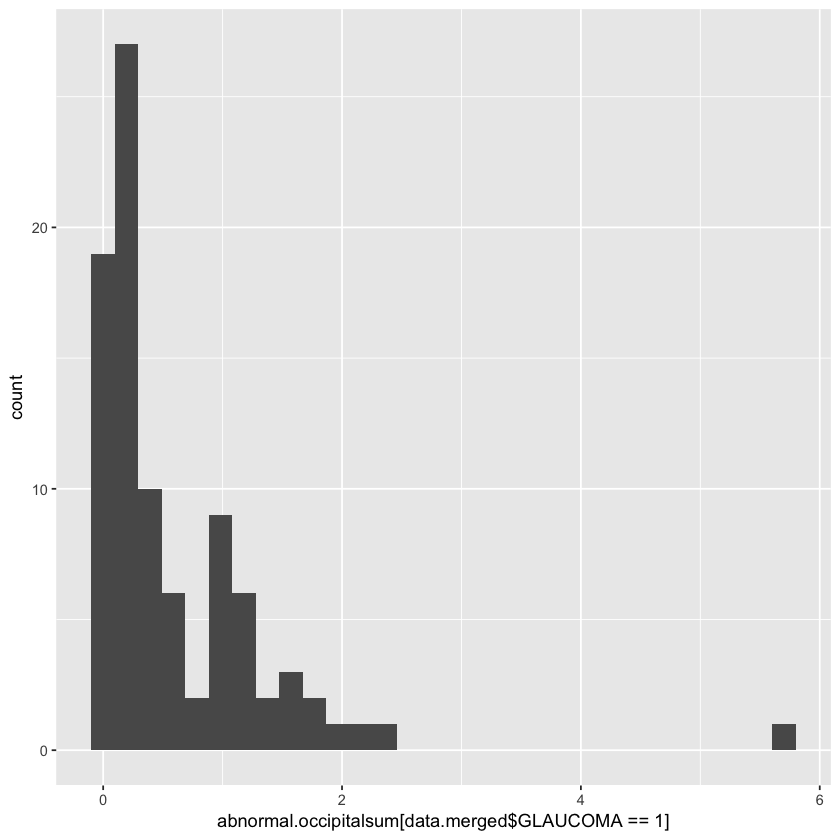

In [51]:
ggplot() + 
geom_histogram(aes(x=abnormal.occipitalsum[data.merged$GLAUCOMA==1]))

In [52]:
wilcox.test(abnormal.occipitalsum~GLAUCOMA, data=data.merged)


	Wilcoxon rank sum test with continuity correction

data:  abnormal.occipitalsum by GLAUCOMA
W = 54023, p-value = 0.2859
alternative hypothesis: true location shift is not equal to 0


In [53]:
wilcox.test(regional.occipitalsum~GLAUCOMA, data=data.merged)


	Wilcoxon rank sum test with continuity correction

data:  regional.occipitalsum by GLAUCOMA
W = 57427, p-value = 0.9034
alternative hypothesis: true location shift is not equal to 0
